In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

In [2]:
DAYS_OF_WEEK = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [3]:
data = pd.read_csv('data/ticks.csv')

In [4]:
data.time = pd.to_datetime(data.time)

In [5]:
data

,test,value,region,time
0,Borrelia burgdorferi s.l (кач) ДНК,1,Челябинская обл,2019-05-25 06:02:00
1,Borrelia burgdorferi s.l (кач) ДНК,1,Челябинская обл,2019-05-27 09:04:00
2,Вирус клещевого энцефалита(кач) РНК,0,Челябинская обл,2019-05-27 09:04:00
3,Borrelia burgdorferi s.l (кач) ДНК,1,Челябинская обл,2019-05-27 09:14:00
4,Вирус клещевого энцефалита(кач) РНК,0,Челябинская обл,2019-05-27 09:14:00
...,...,...,...,...
308540,Вирус клещевого энцефалита(кач) РНК,0,Воронежская обл,2021-05-16 09:37:00
308541,Borrelia burgdorferi s.l (кач) ДНК,0,Москва,2021-05-16 09:26:00
308542,Вирус клещевого энцефалита(кач) РНК,0,Москва,2021-05-16 09:26:00
308543,Borrelia burgdorferi s.l (кач) ДНК,0,Москва,2021-05-17 12:00:00


In [6]:
data.test.unique()

array(['Borrelia burgdorferi s.l (кач) ДНК',
       'Вирус клещевого энцефалита(кач) РНК',
       'Ehrlichia muris/chaffeеnsis(кач) ДНК',
       'Borrelia miyamotoi (кач) ДНК',
       'Anaplasma Phagocytophillum(кач) ДНК'], dtype=object)

In [7]:
tests = {
    'Borrelia burgdorferi s.l (кач) ДНК': 'Bor.B',
    'Вирус клещевого энцефалита(кач) РНК': 'Enc',
    'Ehrlichia muris/chaffeеnsis(кач) ДНК': 'Ehr',
    'Borrelia miyamotoi (кач) ДНК': 'Bor.M',
    'Anaplasma Phagocytophillum(кач) ДНК': 'Ana' 
}

In [8]:
TESTS = list(tests.keys())

In [9]:
data.test.value_counts()

Вирус клещевого энцефалита(кач) РНК     99695
Borrelia burgdorferi s.l (кач) ДНК      99387
Anaplasma Phagocytophillum(кач) ДНК     44427
Ehrlichia muris/chaffeеnsis(кач) ДНК    44421
Borrelia miyamotoi (кач) ДНК            20615
Name: test, dtype: int64

In [10]:
total_in_regions = data.region.value_counts()
total_in_regions

Челябинская обл              158881
Свердловская обл              66422
Московская область            13238
Москва                        13148
Новосибирская обл             12885
                              ...  
Сахалинская обл                   8
Еврейская АО                      6
Ямало-Ненецкий АО                 2
Кабардино-Балкарская Респ         2
Чеченская Респ                    2
Name: region, Length: 67, dtype: int64

In [11]:
min_cases = 1000 #analyze only regions with enouth number of tests
target_regions = list(total_in_regions[total_in_regions > min_cases].index)
target_regions

['Челябинская обл ',
 'Свердловская обл',
 'Московская область',
 'Москва',
 'Новосибирская обл',
 'Курганская обл',
 'Башкортостан Респ',
 'Кемеровская обл',
 'Тюменская обл ',
 'Красноярский край',
 'Краснодарский край',
 'Калужская обл']

In [12]:
min_time = data.time.min()
min_time

Timestamp('2019-02-13 07:37:00')

In [13]:
max_time = data.time.max()
max_time

Timestamp('2021-06-08 23:01:00')

## Grouping data by day

In [ ]:
new_data = pd.DataFrame(columns=['region', 'day', 'test', 'positive', 'negative'])
for region in data.region.unique():
    for test in data.test.unique():
        df = data[(data.region == region) & (data.test == test)]
        negative = df[df.value == 0].time.groupby(by=data.time.dt.date).count()
        positive = df[df.value == 1].time.groupby(by=data.time.dt.date).count()
        for day in pd.date_range(start=min_time, end=max_time):
            day = day.date()
            pos_num = positive[day] if day in positive.index else 0
            neg_num = negative[day] if day in negative.index else 0
            new_data = new_data.append(pd.DataFrame({
                'region': region,
                'day': pd.Timestamp(day),
                'test': test,
                'positive': pos_num,
                'negative':neg_num,
            }, index=[0]), ignore_index=True)

In [ ]:
new_data.to_csv('data/ticks_day.csv', index=False)

In [15]:
data = pd.read_csv('data/ticks_day.csv')
data.day = pd.to_datetime(data.day)

In [16]:
data

,region,day,test,positive,negative
0,Челябинская обл,2019-02-13,Borrelia burgdorferi s.l (кач) ДНК,0,0
1,Челябинская обл,2019-02-14,Borrelia burgdorferi s.l (кач) ДНК,0,0
2,Челябинская обл,2019-02-15,Borrelia burgdorferi s.l (кач) ДНК,0,0
3,Челябинская обл,2019-02-16,Borrelia burgdorferi s.l (кач) ДНК,0,0
4,Челябинская обл,2019-02-17,Borrelia burgdorferi s.l (кач) ДНК,0,0
...,...,...,...,...,...
283740,Чеченская Респ,2021-06-04,Anaplasma Phagocytophillum(кач) ДНК,0,0
283741,Чеченская Респ,2021-06-05,Anaplasma Phagocytophillum(кач) ДНК,0,0
283742,Чеченская Респ,2021-06-06,Anaplasma Phagocytophillum(кач) ДНК,0,0
283743,Чеченская Респ,2021-06-07,Anaplasma Phagocytophillum(кач) ДНК,0,0


## Visualization

In [16]:
def plot(ax, df, title, x_label, plot_type='plot', **kwargs):
    if plot_type == 'plot':
        ax.plot(df.index, df.negative, label='Negative')
        ax.plot(df.index, df.positive, label='Positive')
    elif plot_type == 'bar':
        ax.bar(df.index, df.negative, label='Negative', width=kwargs['bar_width'])
        ax.bar(df.index, df.positive, label='Positive', width=kwargs['bar_width'])
        
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Number')
    ax.legend(loc='upper right')

In [17]:
region = 'Москва'
year = 2020
test = 'Borrelia burgdorferi s.l (кач) ДНК'

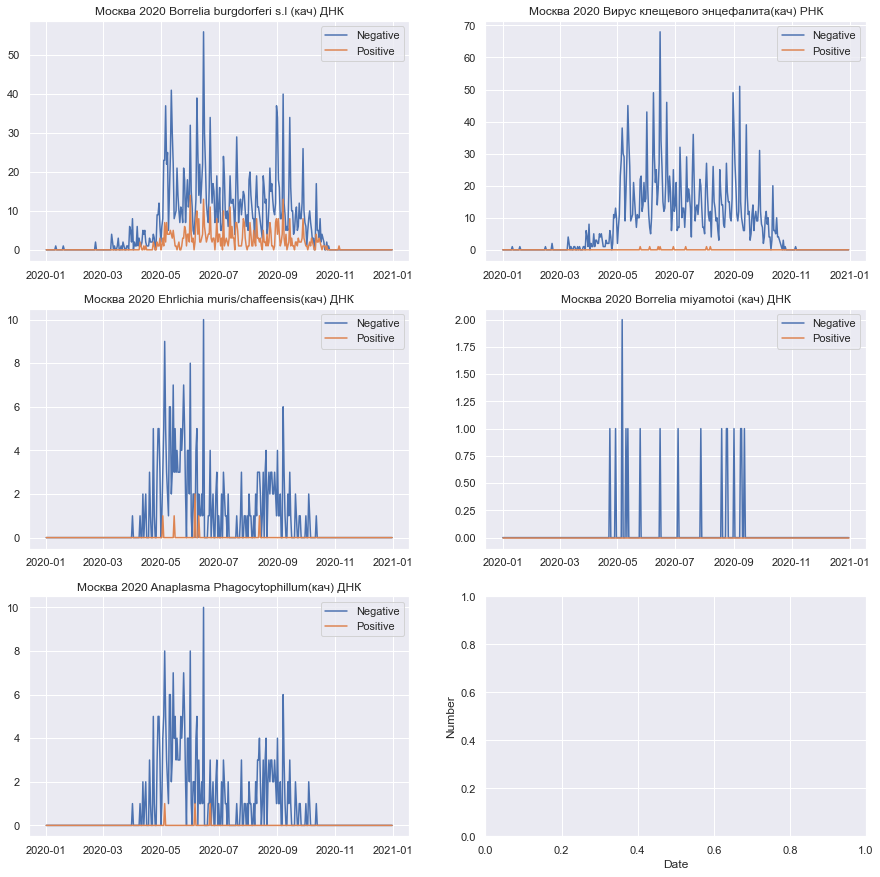

In [27]:
ncols = 2
extra_row = 0 if len(TESTS)%ncols == 0 else 1
nrows = len(TESTS)//ncols + extra_row
fig, axs = plt.subplots(nrows, ncols, figsize=(15,15))
for test, ax in zip(np.append(TESTS, ['']), axs.flatten()):
    if test == '':
        ax.set_title('')
        continue
    ax.set_title(f'{region} {year} {test}')
    
    df = data[(data.region == region) & (data.day.dt.year == year) & (data.test == test)]
    df.index = df.day
    df = df[['positive', 'negative']]
    
    plot(ax, df, f'{region} {year} {test}', 'Date')

### Monthly distribution

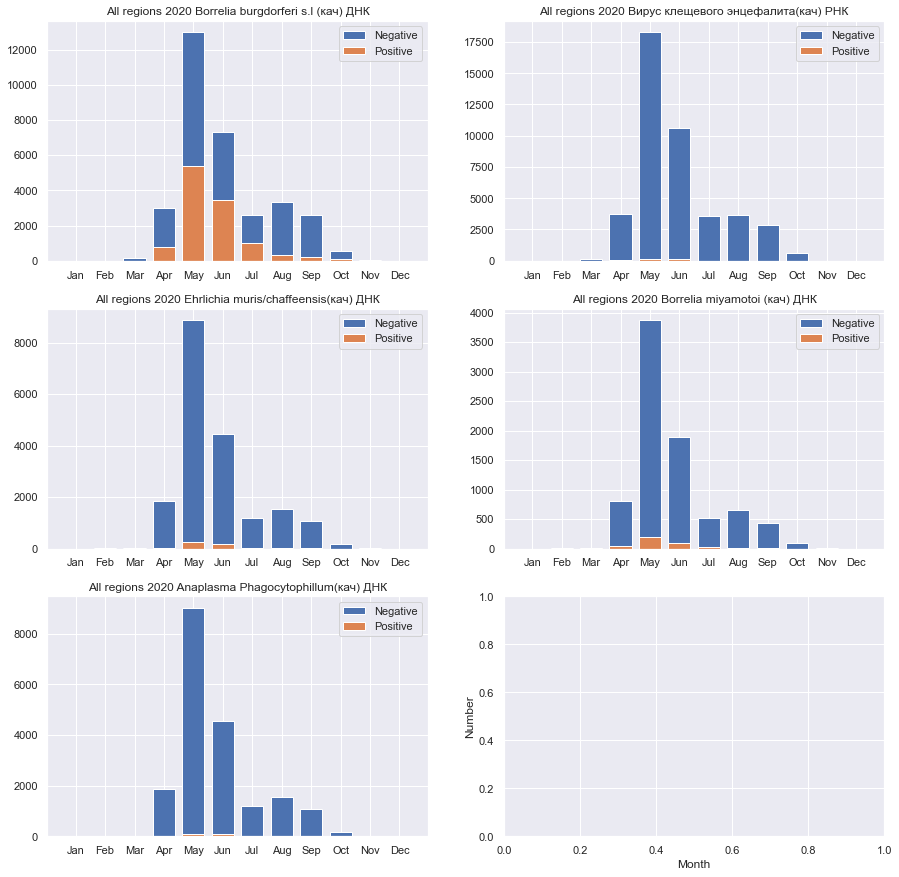

In [31]:
ncols = 2
extra_row = 0 if len(TESTS)%ncols == 0 else 1
nrows = len(TESTS)//ncols + extra_row
fig, axs = plt.subplots(nrows, ncols, figsize=(15,15))
for test, ax in zip(np.append(TESTS, ['']), axs.flatten()):
    if test == '':
        ax.set_title('')
        continue
    ax.set_title(f'All regions {year} {test}')
    
    df = data[(data.day.dt.year == year) & (data.test == test)]
    df.index = df.day
    df = df[['positive', 'negative']]
    
    month_df = df.groupby(pd.Grouper(freq='M')).sum()
    month_df.index = MONTHS
    
    plot(ax, month_df, f'{region} {year} {test}', 'Month', plot_type='bar', bar_width=0.75)

### Conclusion: no testing between November and March.
---

### Distribution by weekday

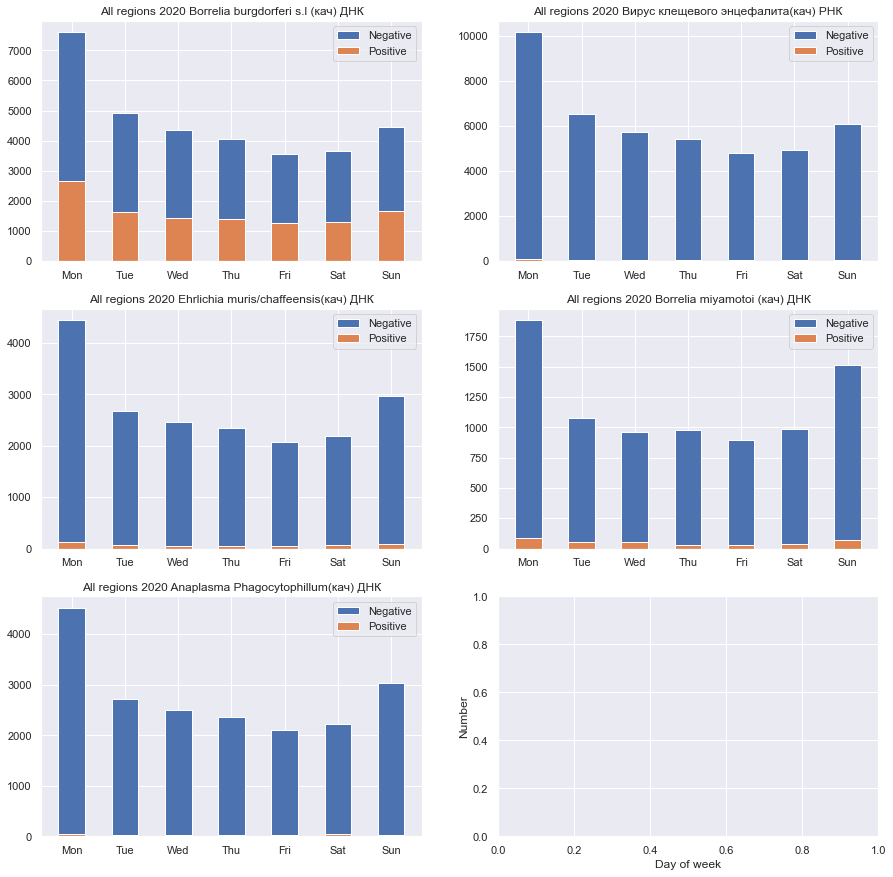

In [32]:
ncols = 2
extra_row = 0 if len(TESTS)%ncols == 0 else 1
nrows = len(TESTS)//ncols + extra_row
fig, axs = plt.subplots(nrows, ncols, figsize=(15,15))
for test, ax in zip(np.append(TESTS, ['']), axs.flatten()):
    if test == '':
        ax.set_title('')
        continue
    ax.set_title(f'All regions {year} {test}')
    
    df = data[(data.day.dt.year == year) & (data.test == test)]
    df.index = df.day
    df = df[['positive', 'negative']]
    
    weekday_df = df.groupby(df.index.weekday).sum()
    weekday_df.index = DAYS_OF_WEEK
    
    plot(ax, weekday_df, f'{region} {year} {test}', 'Day of week', plot_type='bar', bar_width=0.5)

### Conclusion: most testings on Sunday and Monday. Possibly because people go outdoors on the weekends and send tick for testing next day.
---

### Distribution of tests positive rate

In [37]:
sns.set_palette("Paired")

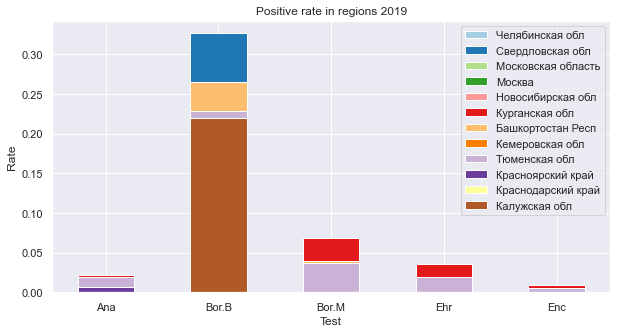

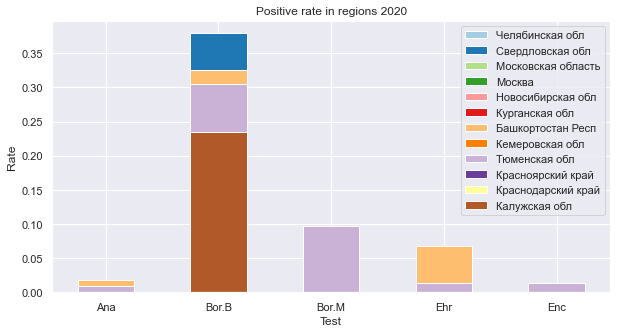

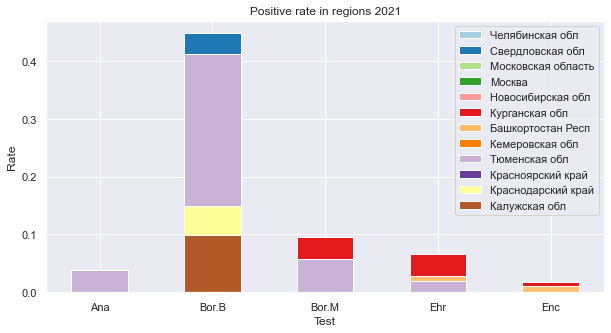

In [55]:
for year in [2019, 2020, 2021]:
    fig, ax = plt.subplots(figsize=(10, 5))
    for region in target_regions:
        test_grouped_df = data[(data.region == region) & (data.day.dt.year == year)].groupby(data.test).sum()
        test_grouped_df['rate'] = test_grouped_df.positive/(test_grouped_df.positive + test_grouped_df.negative)
        test_grouped_df.index = [tests[t] for t in test_grouped_df.index]        
        ax.bar(test_grouped_df.index, test_grouped_df.rate, label=region, width=0.5)

    plt.title(f'Positive rate in regions {year}')
    plt.xlabel('Test')
    plt.ylabel('Rate')
    ax.legend(loc='upper right')

### Conclusion: different postitive rates not only between areas, but also between years.  The most widespread disease - Borrelia burgdorferi.

## Weather influence

In [18]:
from regions import REGIONS

In [49]:
data['day_str'] = data.day.astype(str)
data['region_day'] = data.region + data.day_str

In [35]:
list_df = list(df.columns[1:-1])

In [39]:
weather_dict = {}
for name, data_gr in data.groupby('region_day'):
    df = pd.read_csv(f'data/weather/{REGIONS[data_gr.region.unique()[0]]}.csv')
    day = data_gr.day_str.unique()[0]
    tmp = df.loc[df.date_time == day][list_df]
    tmp['region_day'] = name
    weather_dict[name] = tmp

In [42]:
weather_df = pd.concat(weather_dict.values(), axis=0)

In [50]:
weather_df.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,region_day
0,13,6,0.0,8.7,3,58,11:37 AM,01:16 AM,07:24 AM,05:45 PM,...,10,30,56,0.0,1020,13,10,265,6,Адыгея Респ2019-02-13
1,5,2,0.0,3.8,1,64,12:14 PM,02:23 AM,07:22 AM,05:46 PM,...,16,99,85,0.5,1022,5,10,114,11,Адыгея Респ2019-02-14
2,6,2,0.0,8.7,2,71,01:01 PM,03:31 AM,07:21 AM,05:48 PM,...,23,40,75,0.0,1021,6,10,73,17,Адыгея Респ2019-02-15
3,5,0,0.0,5.5,1,78,01:58 PM,04:37 AM,07:19 AM,05:49 PM,...,13,43,78,0.0,1021,5,10,228,10,Адыгея Респ2019-02-16
4,9,1,0.2,8.7,3,85,03:05 PM,05:37 AM,07:18 AM,05:50 PM,...,28,36,72,0.2,1021,9,9,262,20,Адыгея Респ2019-02-17


In [52]:
data = data.merge(weather_df, on='region_day')

In [54]:
data.columns

Index(['region', 'day', 'test', 'positive', 'negative', 'day_str',
       'region_day', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [57]:
data = data.drop(columns=['day_str', 'region_day', 'moonrise', 'moonset', 'sunrise', 'sunset'])

In [58]:
data.to_csv('data/ticks_weather.csv', index=False)

In [19]:
data = pd.read_csv('data/ticks_weather.csv')

In [20]:
cm = data[data.region.isin(target_regions)].corr()

<AxesSubplot:>

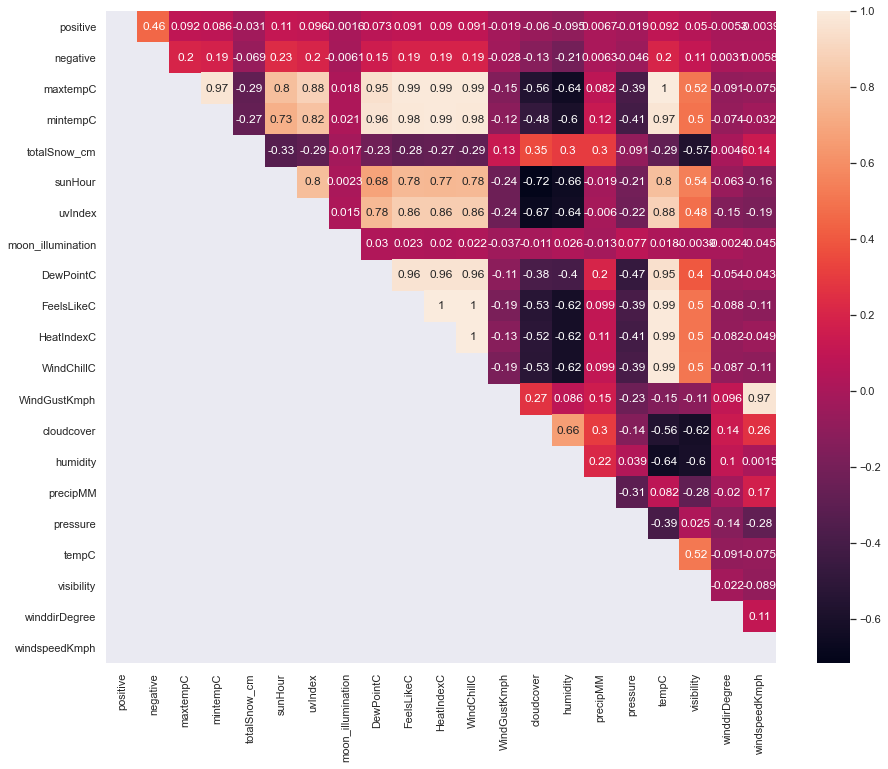

In [21]:
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(cm, annot=True, mask=np.triu(cm).T, ax=ax)

In [22]:
cm[['positive', 'negative']].sort_values('negative')

,positive,negative
humidity,-0.094507,-0.210764
cloudcover,-0.060422,-0.130270
totalSnow_cm,-0.031330,-0.069014
pressure,-0.019329,-0.046166
WindGustKmph,-0.018901,-0.028079
moon_illumination,-0.001566,-0.006119
winddirDegree,-0.005275,0.003080
windspeedKmph,-0.003930,0.005780
precipMM,0.006657,0.006283
visibility,0.050025,0.114302


In [23]:
data_slice = data[(data.region == region) & (data.test == data.test)]

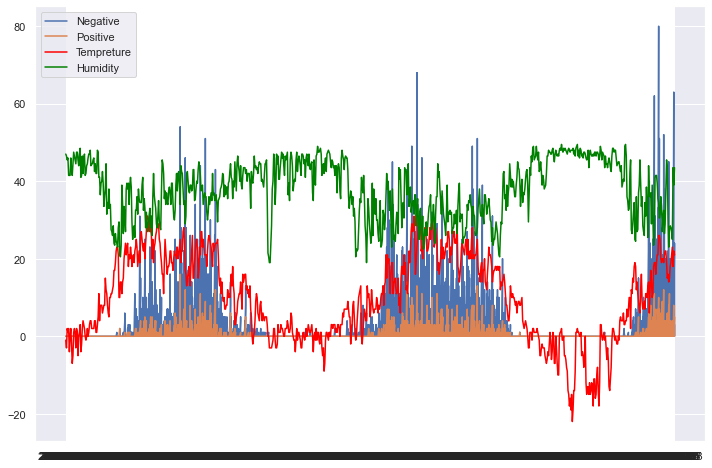

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(data_slice.day, data_slice.negative, label='Negative')
plt.plot(data_slice.day, data_slice.positive, label='Positive')
plt.plot(data_slice.day, data_slice.tempC, label='Tempreture', color='red')
plt.plot(data_slice.day, data_slice.humidity/2, label='Humidity', color='green')
plt.legend(loc='upper left')
plt.show()

### Facts: ticks became active then tempreture is 4ºC or above.
[Burtis, J.C., Sullivan, P., Levi, T. et al. The impact of temperature and precipitation on blacklegged tick activity and Lyme disease incidence in endemic and emerging regions. Parasites Vectors 9, 606 (2016)].
### The number of testings also is strongly connected with this fact.